In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Make the dataset
N = 20
X = np.random.random(N) * 10 - 5 
Y = 0.5 * X - 1 + np.random.random(N)      # make a noise

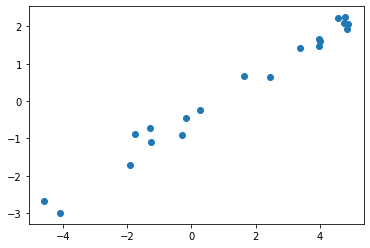

In [4]:
plt.scatter(X,Y)
plt.show()

In [17]:
# Linear regression model

model = nn.Linear(1,1)      # x and y

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)    # learning rate을 0.1로 했더니 값이 수렴하지 않고 발산함


In [18]:
# num samples x num dimensions

X = X.reshape(N,1)
Y = Y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [19]:
type(inputs)

torch.Tensor

In [20]:
# Train the model

n_epochs = 30
losses = []

for it in range(n_epochs):
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # loss data gathering into losses[]
    losses.append(loss.item())
    
    # Backward and Optimization
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/30, Loss: 1.7224
Epoch 2/30, Loss: 1.0366
Epoch 3/30, Loss: 0.6332
Epoch 4/30, Loss: 0.3959
Epoch 5/30, Loss: 0.2563
Epoch 6/30, Loss: 0.1741
Epoch 7/30, Loss: 0.1257
Epoch 8/30, Loss: 0.0971
Epoch 9/30, Loss: 0.0803
Epoch 10/30, Loss: 0.0703
Epoch 11/30, Loss: 0.0644
Epoch 12/30, Loss: 0.0609
Epoch 13/30, Loss: 0.0588
Epoch 14/30, Loss: 0.0575
Epoch 15/30, Loss: 0.0566
Epoch 16/30, Loss: 0.0561
Epoch 17/30, Loss: 0.0558
Epoch 18/30, Loss: 0.0555
Epoch 19/30, Loss: 0.0553
Epoch 20/30, Loss: 0.0551
Epoch 21/30, Loss: 0.0550
Epoch 22/30, Loss: 0.0549
Epoch 23/30, Loss: 0.0548
Epoch 24/30, Loss: 0.0547
Epoch 25/30, Loss: 0.0546
Epoch 26/30, Loss: 0.0545
Epoch 27/30, Loss: 0.0544
Epoch 28/30, Loss: 0.0543
Epoch 29/30, Loss: 0.0542
Epoch 30/30, Loss: 0.0542


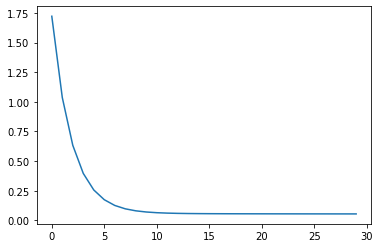

In [21]:
plt.plot(losses)
plt.show()

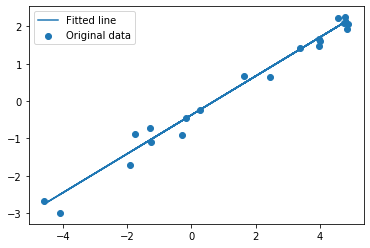

In [22]:
# Plot the graph

predicted = model(inputs).detach().numpy()     # detach function transfer numpy to tensor
plt.scatter(X, Y, label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

In [23]:
# Intend to make error
model(inputs).numpy()

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [24]:
# Another way with function and with no gradient

with torch.no_grad():     # with 로 Function을 부른 후 자동으로 Close 됨
    out = model(inputs).numpy()   # no gradient에서는 바로 numpy로 전환이 가능하다.
out

array([[ 2.142026  ],
       [-2.7546973 ],
       [-1.3754102 ],
       [ 0.9055964 ],
       [ 2.0934072 ],
       [ 1.7153767 ],
       [-0.45625848],
       [-2.5070348 ],
       [-0.52865076],
       [-1.024958  ],
       [-0.22850895],
       [ 2.1095157 ],
       [-1.0437635 ],
       [-1.2911241 ],
       [ 1.691559  ],
       [ 0.48105973],
       [ 1.9957219 ],
       [ 1.3888438 ],
       [ 2.1680255 ],
       [ 1.6915292 ]], dtype=float32)

In [27]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful.
# Why?
# Because *** we know the answer ***
# True value of (w, b) are (0.5, -1)

w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w,b)


[[0.5200565]] [-0.37455165]
